In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# 1. Prepare Data

In [2]:
data = pd.read_csv("data/data.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# 2. Data preprocessing stage

In [4]:
class_mapped = {
    'Abnormal': 1, 
    'Normal': 0
}
data['class'] = data['class'].map(class_mapped)

In [5]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [6]:
X = data.iloc[:, :6].values
y = data['class'].values
print("Total sample of samples: ", X.shape[0])
print("Dimensions of each sample: ", X.shape[1])

Total sample of samples:  310
Dimensions of each sample:  6


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training set number of samples:', X_train.shape[0])
print('Test set sample number:', X_test.shape[0])

Training set number of samples: 279
Test set sample number: 31


In [8]:
import numpy as np
from math import sqrt
from collections import Counter

class kNNClassifier(object):
    def __init__(self, k):
        self.k =k
        self._X_train = None
        self._y_train = None

    def fit(self,X_train,y_train):
        self._X_train = X_train
        self._y_train = y_train
        return self
    
    def predict(self,X_predict):
            y_predict = [self._predict(x) for x in X_predict]
            return np.array(y_predict)

    def _predict(self,x): 
            assert self._X_train is not None
            assert self._y_train is not None

            distances = [sqrt(np.sum((x_train - x)**2)) for x_train in self._X_train]
            sort = np.argsort(distances)
            topK = [self._y_train[i] for i in sort[:self.k]]
            votes = Counter(topK)
            y_predict = votes.most_common(1)[0][0]
            return y_predict

# 3. Training knn Model

In [9]:
knn_model = kNNClassifier(5)

# Training model
knn_model.fit(X_train, y_train)
# Testing model
y_pred = knn_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("predict accuracy: {:.2f}".format(acc))
print("confusion matrix:")
confusion_matrix(y_test, y_pred) # imported the library of sklearn.metrics to compare the predicted and actual lanels for each cell to get the confision matrix

predict accuracy: 0.81
confusion matrix:


array([[ 6,  2],
       [ 4, 19]], dtype=int64)

## 3.1 use difference k 

In [10]:
from sklearn.model_selection import GridSearchCV
n_neighbors_lst = list(range(1, 11, 1))
mean_test_score_lst = []
confusion_matrix_lst = []
for k in n_neighbors_lst:
    knn_model = kNNClassifier(k)
    # Training model
    knn_model.fit(X_train, y_train)
    # Testing model
    y_pred = knn_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    mean_test_score_lst.append(acc)
    confusion_matrix_lst.append(confusion_matrix(y_test, y_pred))

In [11]:
# best accuracy is 0.838
print("best k:{0}, best acc: {1}".format(np.argmax(mean_test_score_lst), mean_test_score_lst[np.argmax(mean_test_score_lst)]))
print("confusion matrix:")
confusion_matrix_lst[np.argmax(mean_test_score_lst)]

best k:9, best acc: 0.8387096774193549
confusion matrix:


array([[ 6,  2],
       [ 3, 20]], dtype=int64)

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# 4. Visualization knn Result

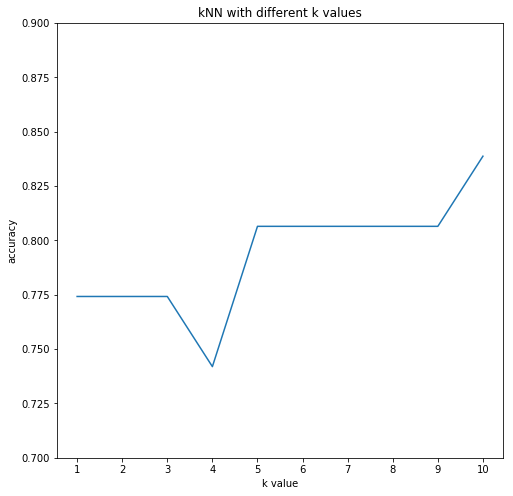

In [13]:
plt.figure(figsize=(8, 8))
plt.plot(mean_test_score_lst)
plt.title('kNN with different k values')

plt.xlabel('k value')
plt.xticks(range(len(n_neighbors_lst)), n_neighbors_lst)

plt.ylabel('accuracy')
plt.ylim([0.7, 0.9])

plt.show()

# 5. Training LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

lr = LogisticRegression()

# Training model
lr.fit(X_train, y_train)
# Testing model
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("predict accuracy: {:.2f}".format(acc))
print("confusion matrix:")
confusion_matrix(y_test, y_pred)

predict accuracy: 0.84
confusion matrix:


array([[ 6,  2],
       [ 3, 20]], dtype=int64)

In [15]:
lr = LogisticRegression(solver='lbfgs')

# Training model
lr.fit(X_train, y_train)
# Testing model
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("predict accuracy: {:.2f}".format(acc))
confusion_matrix(y_test, y_pred)

predict accuracy: 0.87


array([[ 6,  2],
       [ 2, 21]], dtype=int64)